In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [212]:
# Checking the number of mice in the DataFrame.
mice_count = len(merge_df["Mouse ID"].unique())
print(f"There are {mice_count} experiments in this study.")


There are 249 experiments in this study.


In [213]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [234]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merge_df.loc[merge_df.duplicated(subset = ["Mouse ID", "Timepoint"]),]
duplicate_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [215]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [216]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
print(f"there are a total of {mouse_count} used in this study.")


there are a total of 249 used in this study.


In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [218]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summaryData = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()

,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


# BAR PLOT

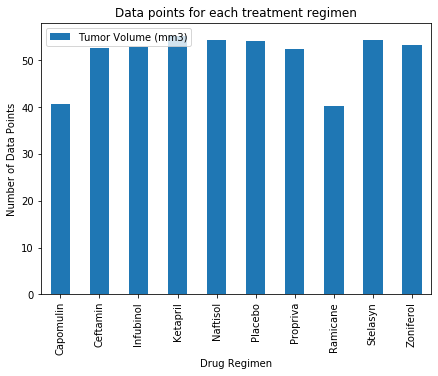

<Figure size 432x288 with 0 Axes>

In [219]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
merge_df.groupby("Drug Regimen")
groupByData = merge_df.groupby("Drug Regimen")
summaryDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()


summaryDF.plot(kind="bar", figsize=(7,5))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

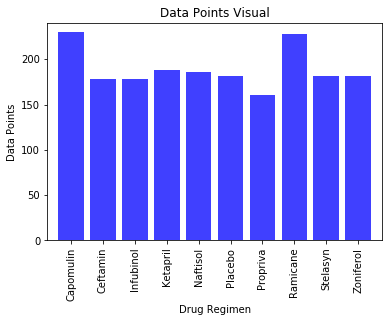

In [220]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(summaryDF))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  
                               rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

# PIE PLOT

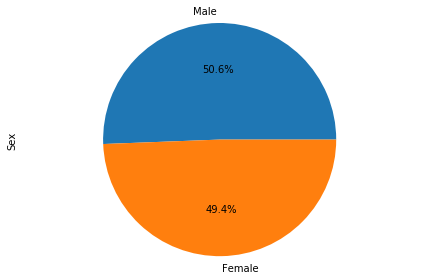

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = merge_df["Sex"].value_counts()
explode = (0.1,0)
plt.figure()
mice_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")

plt.tight_layout()
plt.show()

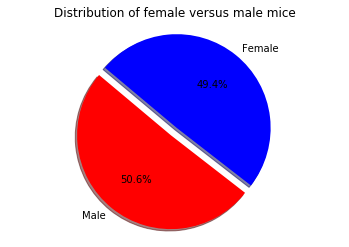

In [222]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_count.values, explode=explode, labels=mice_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()

# Quartiles,outliers and boxplots

In [223]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = merge_df[merge_df['Drug Regimen'].isin(four_drug_list)]
#four_drugs.head()

four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)                                                                   
four_last_tumor

four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_unstack

# Do quartile calculations for each drug
counter = 0

for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
   
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1


--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


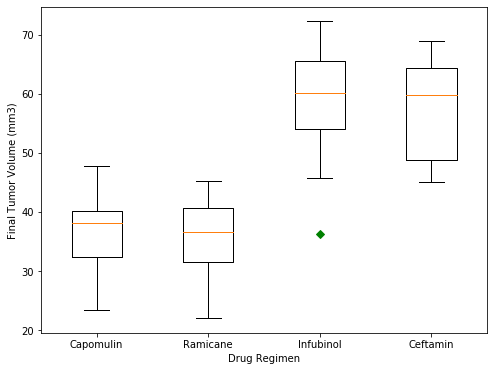

In [232]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

fig1, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)

plt.show()



# Line and scatter plot

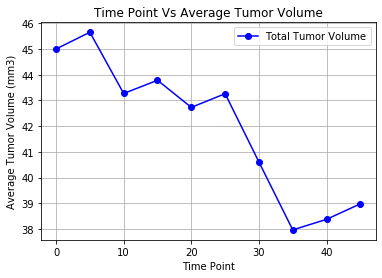

In [225]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tumorData = merge_df[(merge_df["Drug Regimen"] == "Capomulin") & (merge_df["Mouse ID"] == "b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(32, 45)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [226]:

scatterData = merge_df[(merge_df["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterDataDF = scatterDataDF.reset_index()
scatterDataDF.head()



,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

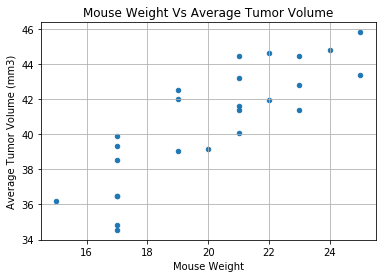

In [227]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show

# Correlation and regression

In [228]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatterDataDF["Weight (g)"], scatterDataDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


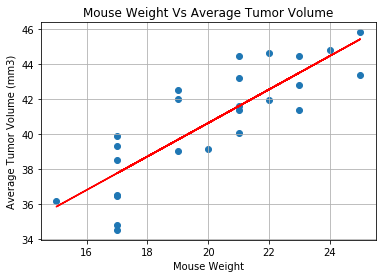

In [233]:
x_values = scatterDataDF["Weight (g)"]
y_values = scatterDataDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()